Load diabetes dataset from sklearn:

In [100]:
from sklearn.datasets import load_diabetes

In [101]:
diabetes=load_diabetes(return_X_y=False)

In [102]:
diabetes.data.shape

(442, 10)

In [103]:
diabetes.target.shape

(442,)

Split the dataset:

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
sk_x_train,sk_x_test,sk_y_train,sk_y_test=train_test_split(diabetes.data,diabetes.target,random_state=3009)

In [106]:
print(sk_x_train.shape)
print(sk_x_test.shape)
print(sk_y_train.shape)
print(sk_y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


Apply Lasso to the dataset:

In [107]:
from sklearn.linear_model import Lasso

In [108]:
sk_lasso = Lasso().fit(sk_x_train,sk_y_train)

Training R^2:

In [109]:
sk_las_train=sk_lasso.score(sk_x_train,sk_y_train)
sk_las_train

0.348796162924661

Test R^2:

In [110]:
sk_las_test=sk_lasso.score(sk_x_test,sk_y_test)
sk_las_test

0.3808729050870183

In [111]:
import numpy as np
np.sum(sk_lasso.coef_ != 0)

2

Number of features used:

In [112]:
print('Training set: ',sk_x_train.shape[1]) #training set
print('Test set: ',sk_x_test.shape[1]) #test set

Training set:  10
Test set:  10


Feature Names:

In [113]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

- age     age in years
- sex
- bmi     body mass index
- bp      average blood pressure
- s1      tc, T-Cells (a type of white blood cells)
- s2      ldl, low-density lipoproteins
- s3      hdl, high-density lipoproteins
- s4      tch, thyroid stimulating hormone
- s5      ltg, lamotrigine
- s6      glu, blood sugar level

Using TextFile (diabetes.data) version:

In [118]:
import numpy as np
header=np.genfromtxt("diabetes.data.txt",delimiter='\t',dtype=str)[0]
x=np.genfromtxt("diabetes.data.txt", delimiter='\t')[1:]
x.shape #original data extracted from file

(442, 11)

In [119]:
diab_data = []
diab_target=[]
for i in range(x.shape[0]):
    feat_data=[]
    for j in range(x.shape[1]):
        if j==x.shape[1]-1:
            diab_target+=[x[i][j]]
            diab_data+=[feat_data]
        else:
            feat_data+=[x[i][j]]
diab_data=np.asarray(diab_data)
diab_target=np.asarray(diab_target)

Split this dataset:

In [122]:
x_train,x_test,y_train,y_test=train_test_split(diab_data,diab_target,random_state=3009)

Apply Lasso to the customized dataset:

In [123]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(x_train,y_train)

Training R^2:

In [124]:
las_train=lasso.score(x_train,y_train)
las_train

0.509923192508838

Test R^2:

In [125]:
las_test=lasso.score(x_test,y_test)
las_test

0.4880931208603847

In [126]:
sk_las_train

0.348796162924661

In [127]:
sk_las_test 

0.3808729050870183

Conclusion:
When considering both the training set and test set, the R^2 is larger when trying to apply Lasso on the dataset obtained from text file, than that obtained from sklearn.

In [128]:
np.sum(lasso.coef_ != 0)

9

Number of features used

In [129]:
x_train.shape[1]

10

In [130]:
x_test.shape[1]

10

Feature names

In [131]:
for i in range(len(header)-1):
    print(header[i])

AGE
SEX
BMI
BP
S1
S2
S3
S4
S5
S6


Preprocess the dataset using StandardScaler:

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler_train=StandardScaler().fit_transform(x_train)
scaler_train.shape

(331, 10)

In [135]:
scaler_test=StandardScaler().fit_transform(x_test)
scaler_test.shape

(111, 10)

In [136]:
lasso_standard=Lasso().fit(scaler_train,y_train)

In [137]:
las_standard_train=lasso_standard.score(scaler_train,y_train)

In [138]:
las_standard_test=lasso_standard.score(scaler_test,y_test)

Training R^2 (after standardized), using diabetes.data:

In [139]:
las_standard_train

0.5107040129941715

Test R^2 (after standardized), using diabetes.data:

In [140]:
las_standard_test

0.4844368309325131

Training R^2 (before standardized), using diabetes.data:

In [141]:
las_train

0.509923192508838

Testing R^2 (before standardized), using diabetes.data:

In [142]:
las_test

0.4880931208603847

Training R^2 (not standardized), using sklearn diabetes dataset:

In [143]:
sk_las_train

0.348796162924661

Testing R^2 (not standardized), using sklearn diabetes dataset:

In [144]:
sk_las_test 

0.3808729050870183

Conclusion: Both (standardized) training and test R^2s are closer to the results in item 6, since they are using the same set of data (diabetes.data).

Varying alpha, curve (test R^2 vs number of features used):

In [149]:
lasso_standard_default=Lasso().fit(scaler_train,y_train)
r2_default=lasso_standard_default.score(scaler_test,y_test)
num_feat_def=np.sum(lasso_standard_default.coef_ != 0)
num_feat_def

8

In [150]:
lasso_standard_001=Lasso(alpha=0.01,max_iter=100000).fit(scaler_train,y_train)
r2_001=lasso_standard_001.score(scaler_test,y_test)
num_feat_001=np.sum(lasso_standard_001.coef_ != 0)
num_feat_001

10

In [151]:
lasso_standard_00001=Lasso(alpha=0.0001,max_iter=100000).fit(scaler_train,y_train)
r2_00001=lasso_standard_00001.score(scaler_test,y_test)
num_feat_00001=np.sum(lasso_standard_001.coef_ != 0)
num_feat_00001

10

In [152]:
r2_default

0.4844368309325131

In [153]:
r2_001

0.4942344472274647

In [154]:
r2_00001

0.4945070960432687

Text(0, 0.5, 'Test R^2')

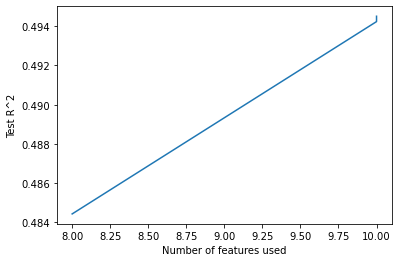

In [155]:
import matplotlib.pyplot as plt
plt.plot([num_feat_00001,num_feat_001,num_feat_def],[r2_00001,r2_001,r2_default])
plt.xlabel("Number of features used")
plt.ylabel("Test R^2")

(0.0, 1.0)

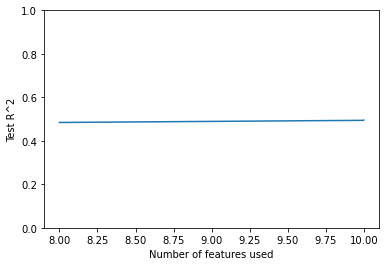

In [156]:
import matplotlib.pyplot as plt
plt.plot([num_feat_00001,num_feat_001,num_feat_def],[r2_00001,r2_001,r2_default])
plt.xlabel("Number of features used")
plt.ylabel("Test R^2")
plt.ylim(0,1)

Choose the regularization parameter using cross-validation:

In [157]:
from sklearn.model_selection import cross_val_score

In [158]:
scaler_train.shape

(331, 10)

In [159]:
y_train.shape

(331,)

In [160]:
def genAlphas(depth=0):
    alphas=[]
    for i in range(depth+1):
        alphas+=[1/(10**i)]
    return alphas
genAlphas(3)

[1.0, 0.1, 0.01, 0.001]

In [161]:
alphas=genAlphas(5)
acc_train = 0
acc_test = 0
op_train_alpha = 0
op_test_alpha = 0
op_lass = None
for i in range(len(alphas)):
    lass=Lasso(alpha=alphas[i],max_iter=100000)
    accuracy=np.mean(cross_val_score(lass,scaler_train,y_train))
    if accuracy > acc_train:
        op_train_alpha = alphas[i]
        acc_train=accuracy
        op_lass=lass
acc_test=acc_train
op_test_alpha=op_train_alpha
print('Chosen alpha: ',op_train_alpha)
print('Training R^2: ',op_lass.fit(scaler_train,y_train).score(scaler_train,y_train))
print('Test R^2: ',op_lass.fit(scaler_train,y_train).score(scaler_test,y_test))
print('Number of features used: ',scaler_train.shape[1])

Chosen alpha:  1.0
Training R^2:  0.5107040129941715
Test R^2:  0.4844368309325131
Number of features used:  10


Inductive Conformal Predictor:

In [162]:
x_train.shape

(331, 10)

In [163]:
x_test.shape

(111, 10)

In [164]:
y_train.shape

(331,)

In [165]:
y_test.shape

(111,)

Splitting the original training set:

In [166]:
x_train_train,x_train_calib,y_train_train,y_train_calib=train_test_split(x_train,y_train,random_state=3009,train_size=99)

In [167]:
x_train_train.shape

(99, 10)

In [168]:
y_train_train.shape

(99,)

In [169]:
x_train_calib.shape

(232, 10)

In [170]:
y_train_calib.shape

(232,)

Preprocessing training set proper, calibration set and test set:

In [171]:
scaler_x_train_train=StandardScaler().fit_transform(x_train_train)
scaler_x_train_train.shape

(99, 10)

In [172]:
scaler_x_train_calib=StandardScaler().fit_transform(x_train_calib)
scaler_x_train_calib.shape

(232, 10)

In [173]:
scaler_x_test=StandardScaler().fit_transform(x_test)
scaler_x_test.shape

(111, 10)